In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [160]:
# 2020년도 상반기 한국전력공사 전기차충전소충전량 파일을 불러옵니다.

chardata2001_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202001_202006).csv', encoding = 'cp949')

In [161]:
# 2020년도 상반기 한국전력공사 전기차충전소충전량 파일에서 필요없는 ['충전기ID'] 컬럼을 제거합니다.

chardata2001_df.drop(columns = ['충전기ID'], inplace = True)

In [162]:
chardata2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.310,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.850,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.650,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
3,경기북부,경기북부직할,양주자이2단지 아파트,완속02,경기도 양주시 삼숭동 삼숭로38번길 78-12,완속,7.0,8.500,2,41,2020-01-01,2020-01-01 20:05:00,2020-01-01 22:46:00
4,인천,남인천,서창LH6단지,완속01,인천광역시 남동구 서창남순환로 190-100,완속,7.0,12.700,2,51,2020-01-01,2020-01-01 16:17:00,2020-01-01 19:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,환경부,환경부,청도새마을휴게소(대구방향),급속01,경상북도 청도군 청도읍 하지길 59-50,급속,NaN,14.530,0,19,2020-06-28,2020-06-28 16:46:00,2020-06-28 17:06:00
1048571,광주전남,광산,수완동 행정복지센터,급속01,"광주광역시 광산구 장덕로 158 (수완동, 수완동행정복지센터/수완보건지소)",급속,50.0,28.770,0,41,2020-06-28,2020-06-28 20:03:00,2020-06-28 20:45:00
1048572,경기,이천,이천휴게소(하남방향),급속01,경기도 이천시 신둔면 용면리 산 86,급속,50.0,15.017,0,29,2020-06-28,2020-06-28 20:20:00,2020-06-28 20:49:00
1048573,인천,영종,영종힐스테이트,완속03,인천광역시 중구 하늘별빛로 66,완속,7.0,10.500,3,49,2020-06-28,2020-06-28 17:00:00,2020-06-28 20:49:00


In [163]:
# 2020년도 상반기 전기차충전소충전량 파일에서 주소가 광주광역시인 데이터를 기준으로 광주광역시 데이터 프레임을 저장합니다.

chardatagj2001_df = chardata2001_df[chardata2001_df['주소'].str.contains('광주광역시', na = False)]

In [164]:
chardatagj2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00


In [165]:
# 2020년도 하반기 한국전력공사 전기차충전소충전량 파일을 불러옵니다.

chardata2002_df = pd.read_csv('data/한국전력공사_전기차충전소충전량(202007_202012).csv', encoding = 'cp949')

In [166]:
# 2020년도 하반기 한국전력공사 전기차충전소충전량 파일에서 필요없는 ['충전기ID'] 컬럼을 제거합니다.

chardata2002_df.drop(columns = ['충전기ID'], inplace = True)

In [167]:
# 2020년도 하반기 전기차충전소충전량 파일에서 주소가 광주광역시인 데이터를 기준으로 광주광역시 데이터 프레임을 저장합니다.

chardatagj2002_df = chardata2002_df[chardata2002_df['주소'].str.contains('광주광역시', na = False)]

In [168]:
chardatagj2002_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37


In [169]:
# 2020년도 상반기 광주광역시 '구' 컬럼 생성을 위한 주소 분리 작업을 실시합니다.

chardatagj2001_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
2,광주광역시,남구,효우로,332-11,"(행암동,",효천2지구,중흥S-클래스,아파트),None,None
38,광주광역시,광산구,선운로20번길,47,"(선암동,",광주,선운지구,EG,the1,1단지)
41,광주광역시,광산구,목련로21번길,20,"(산정동,",하남2지구,중흥S-클래스),None,None,None
58,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
100,광주광역시,광산구,풍영로170번길,39-10,"(장덕동,",성덕마을,대방노블랜드3차),None,None,None
...,...,...,...,...,...,...,...,...,...,...
1048447,광주광역시,광산구,임방울대로,261,"(신가동,",농수산물유통센터),None,None,None,None
1048495,광주광역시,남구,효천3로,110,"(임암동,",중흥,S-클래스,에코파크),None,None
1048524,광주광역시,광산구,목련로219번길,25,(운남동),None,None,None,None,None
1048550,광주광역시,광산구,비아중앙로31번길,6,"(비아동,",비아동,행정복지센터),None,None,None


In [170]:
# '구' 컬럼을 생성합니다.

chardatagj2001_df['구'] = chardatagj2001_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_21204\3020004240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chardatagj2001_df['구'] = chardatagj2001_df['주소'].str.split(" ",expand=True)[1]


In [171]:
chardatagj2001_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00,광산구


In [172]:
# 2020년도 하반기 광주광역시 '구' 컬럼 생성을 위한 주소 분리 작업을 실시합니다.

chardatagj2002_df['주소'].str.split(" ", expand = True)

,0,1,2,3,4,5,6,7,8,9
64,광주광역시,서구,경열로,39,(농성동),None,None,None,None,None
80,광주광역시,북구,불태3로,3,(월출동),None,None,None,None,None
112,광주광역시,동구,남문로,307,"(월남동,",월남호반베르디움,2차),None,None,None
162,광주광역시,서구,화개1로,78번길,8,None,None,None,None,None
183,광주광역시,북구,서하로94번길,10,"(용봉동,",쌍용예가),None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1007882,광주광역시,서구,상무버들로40번길,14,"(유촌동,",상무버들마을1주공아파트),None,None,None,None
1007896,광주광역시,서구,화운로,278,"(광천동,",광천,e편한세상),None,None,None
1007932,광주광역시,동구,의재로,123,"(운림동,",무등파크맨션),None,None,None,None
1007976,광주광역시,광산구,용아로,175,"(우산동,",국제미소래아파트),None,None,None,None


In [173]:
# '구' 컬럼을 생성합니다.

chardatagj2002_df['구'] = chardatagj2002_df['주소'].str.split(" ",expand=True)[1]

C:\Users\admin\AppData\Local\Temp\ipykernel_21204\2954304192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chardatagj2002_df['구'] = chardatagj2002_df['주소'].str.split(" ",expand=True)[1]


In [174]:
chardatagj2002_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [175]:
# 2020년도 상반기 데이터 중 중복 값 없는 데이터를 위한 사전작업을 진행합니다. (데이터 프레임 복사)

chardatagj2001_df_copy = chardatagj2001_df.copy()

In [176]:
# 2020년도 하반기 데이터 중 중복 값 없는 데이터를 위한 사전작업을 진행합니다. (데이터 프레임 복사)

chardatagj2002_df_copy = chardatagj2002_df.copy()

In [177]:
chardatagj2001_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,30.25,0,50,2020-06-28,2020-06-28 20:54:00,2020-06-28 21:45:00,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,35.08,5,4,2020-06-28,2020-06-28 16:12:00,2020-06-28 21:17:00,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,39.41,1,23,2020-06-28,2020-06-28 18:37:00,2020-06-28 20:01:00,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,20.02,0,36,2020-06-28,2020-06-28 22:37:00,2020-06-28 23:13:00,광산구


In [178]:
chardatagj2002_df_copy

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,8.90,41,28,2020-07-01,2020-06-29 15:57:26,2020-07-01 09:26:23,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,87.97,1,0,2020-07-01,2020-06-30 23:01:42,2020-07-01 00:02:23,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,56.09,8,43,2020-07-01,2020-06-30 20:17:28,2020-07-01 05:01:03,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,27.10,4,16,2020-07-01,2020-06-30 21:22:30,2020-07-01 01:38:44,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,82.28,1,54,2020-07-01,2020-06-30 22:45:49,2020-07-01 00:40:23,북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [179]:
# 2020년도 상반기 자치구별 데이터 프레임에서 필요한 컬럼만 모아 새로운 데이터 프레임을 생성합니다.

chargegj2001_dist_df = chardatagj2001_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [180]:
# 2020년도 상반기 광주광역시 자치구별 충전소 가동 데이터


chargegj2001_dist_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
1048447,광주전남,광산,광주유통센터,급속01,"광주광역시 광산구 임방울대로 261 (신가동, 농수산물유통센터)",급속,50.0,광산구
1048495,광주전남,서광주,효천1중흥S-클래스에코파크,완속05,"광주광역시 남구 효천3로 110 (임암동, 중흥 S-클래스 에코파크)",완속,7.0,남구
1048524,광주전남,광산,운남동 행정복지센터,급속01,광주광역시 광산구 목련로219번길 25 (운남동),급속,50.0,광산구
1048550,광주전남,광산,비아동 주민센터,급속01,"광주광역시 광산구 비아중앙로31번길 6 (비아동, 비아동 행정복지센터)",급속,50.0,광산구


In [181]:
# 2020년도 하반기 자치구별 데이터 프레임에서 필요한 컬럼만 모아 새로운 데이터 프레임을 생성합니다.

chargegj2002_dist_df = chardatagj2002_df_copy.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [182]:
# 2020년도 하반기 광주광역시 자치구별 충전소 가동 데이터

chargegj2002_dist_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,광산구


In [183]:
# 2020년도 상반기 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj2001_distdd_df = chargegj2001_dist_df.drop_duplicates()

In [184]:
chargegj2001_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
969646,환경부,환경부,광주망월주유소,급속01,광주광역시 북구 동문대로 603,급속,NaN,북구
972707,환경부,환경부,무등산생태탐방원,급속01,광주광역시 북구 충효동 805번지,급속,NaN,북구
1026180,환경부,환경부,동구다목적체육관 제1주차장,급속01,광주광역시 동구 남문로 418-15,급속,NaN,동구
1030045,환경부,환경부,광주교육과학연구원,급속01,광주광역시 동구 의재로 109번길 10,급속,NaN,동구


In [185]:
# 2020년도 하반기 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj2002_distdd_df = chargegj2002_dist_df.drop_duplicates()

In [186]:
chargegj2002_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
64,한국전력,한국전력,서광주지사,완속02,광주광역시 서구 경열로 39 (농성동),완속,7.0,서구
80,광주전남,광주전남직할,첨단공용차고지,급속01,광주광역시 북구 불태3로 3 (월출동),급속,200.0,북구
112,광주전남,광주전남직할,월남 호반베르디움2차,완속03,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
162,광주전남,서광주,금호5차호반리젠시빌,완속01,광주광역시 서구 화개1로 78번길 8,완속,7.0,서구
183,광주전남,광주전남직할,용봉동쌍용예가,급속01,"광주광역시 북구 서하로94번길 10 (용봉동, 쌍용예가)",급속,50.0,북구
...,...,...,...,...,...,...,...,...
896247,광주전남,광산,수완산이고운더테라스,완속01,"광주광역시 광산구 상완길 299 (수완동, 수완산이고운더테라스)",완속,7.0,광산구
896350,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
897092,광주전남,광산,수안채리치아파트,완속02,"광주광역시 광산구 임방울대로378번길 45 (수완동, 수안채리치)",완속,7.0,광산구
898608,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구


In [187]:
# 2020년도 광주광역시 자치구별 충전소 가동 상반기 하반기 데이터를 병합합니다. 

chargegj20_dist_df = pd.concat([chargegj2001_distdd_df, chargegj2002_distdd_df])

In [188]:
# 2020년도 광주광역시 자치구별 데이터에서 중복된 데이터를 제거합니다.

chargegj20_distdd_df = chargegj20_dist_df.drop_duplicates()

In [189]:
chargegj20_distdd_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,광산구
...,...,...,...,...,...,...,...,...
896247,광주전남,광산,수완산이고운더테라스,완속01,"광주광역시 광산구 상완길 299 (수완동, 수완산이고운더테라스)",완속,7.0,광산구
896350,광주전남,광주전남직할,장등공용차고지,급속01,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구
897092,광주전남,광산,수안채리치아파트,완속02,"광주광역시 광산구 임방울대로378번길 45 (수완동, 수안채리치)",완속,7.0,광산구
898608,광주전남,광주전남직할,장등공용차고지,급속02,광주광역시 북구 장운길 55 (장등동),급속,200.0,북구


In [190]:
# 2020년도 광주광역시 자치구별 전기차 충전소 가동 현황을 출력합니다.

print(chargegj20_distdd_df['구'].value_counts())

광산구    103
북구      58
서구      47
동구      26
남구      25
Name: 구, dtype: int64


In [191]:
# 2020년도 광주광역시 전체 전기차 충전소 가동 현황을 더합니다.

chargegj20_distdd_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 2          남구
38        광산구
41        광산구
58         동구
100       광산구
         ... 
896247    광산구
896350     북구
897092    광산구
898608     북구
947807     남구
Name: 구, Length: 259, dtype: object>

In [192]:
# 2020년도 광주광역시 자치구별 전기차 가동률을 구합니다.

np.round(chargegj20_distdd_df['구'].value_counts().div(259), 2)

광산구    0.40
북구     0.22
서구     0.18
동구     0.10
남구     0.10
Name: 구, dtype: float64

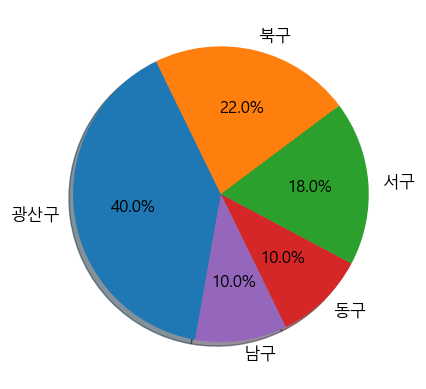

In [193]:
# 2020년도 전기차 충전소 자치구별 가동 비율을 원형그래프로 시각화합니다.(광주 자치구 기준, 한국전력, 환경부 설치)

ratio = [40, 22, 18, 10, 10]
labels = ['광산구', '북구', '서구', '동구', '남구']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [194]:
# 2020년도 광주광역시 전기차 충전소에서 가동된 급속, 완속 충전기의 합을 구합니다.

print(chargegj20_distdd_df['충전기구분'].value_counts())

완속    130
급속    129
Name: 충전기구분, dtype: int64


<AxesSubplot:>

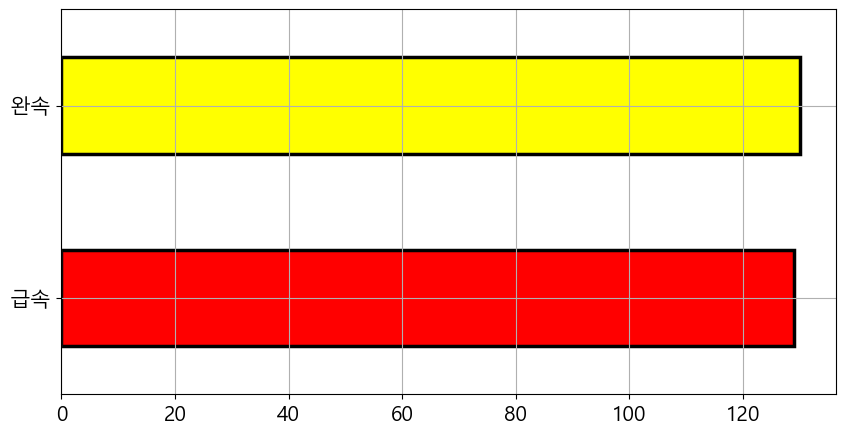

In [195]:
# 20년도 충전기 가동 현황 총합 (완속, 급속)

chargergj20dist = pd.value_counts(chargegj20_distdd_df['충전기구분'].values, sort=True, ascending = True)
chargergj20dist.plot.barh()
chargergj20dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [196]:
# 2020년도 광주광역시 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargergj20_df = chargegj20_distdd_df[['구', '충전기구분']]
chargergj20_df = chargergj20_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargergj20_df)

0
구   충전기구분    
광산구 급속     46
    완속     57
남구  급속     14
    완속     11
동구  급속     12
    완속     14
북구  급속     30
    완속     28
서구  급속     27
    완속     20

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(광산구, 급속)'),
  Text(1, 0, '(광산구, 완속)'),
  Text(2, 0, '(남구, 급속)'),
  Text(3, 0, '(남구, 완속)'),
  Text(4, 0, '(동구, 급속)'),
  Text(5, 0, '(동구, 완속)'),
  Text(6, 0, '(북구, 급속)'),
  Text(7, 0, '(북구, 완속)'),
  Text(8, 0, '(서구, 급속)'),
  Text(9, 0, '(서구, 완속)')])

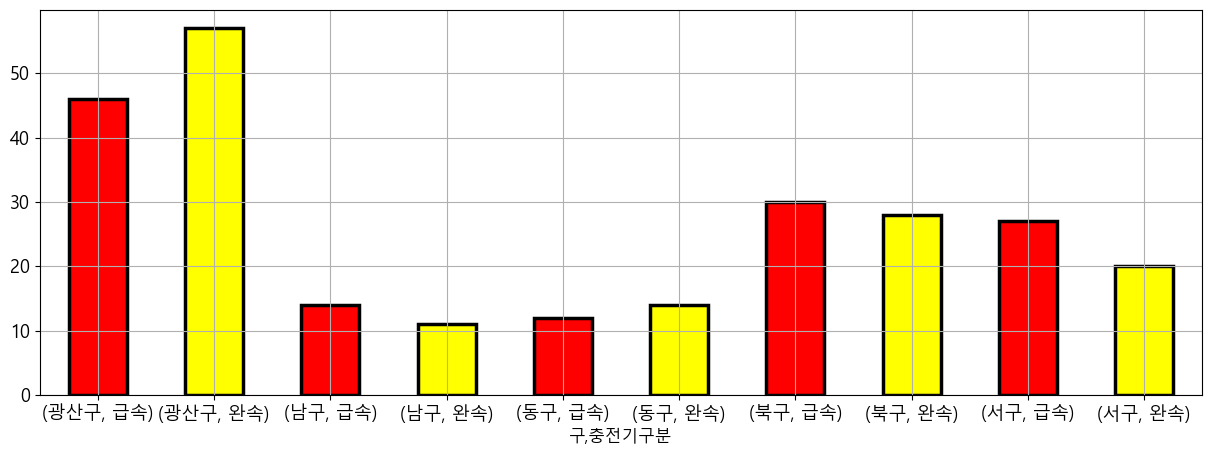

In [197]:
# 2020년도 광주광역시 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chargergj20_df.plot.bar()
chargergj20_df.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [198]:
# chardatagj2001_df
# chardatagj2002_df

In [199]:
# 2020년도 광주광역시 자치구별 충전소 가동 상반기 하반기 데이터를 병합합니다. 

chargecountgj20_df = pd.concat([chardatagj2001_df, chardatagj2002_df])

In [200]:
chargecountgj20_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,구
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,남구
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광산구
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광산구
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,동구
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007882,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41:41,2020-12-03 02:42:07,서구
1007896,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09:58,2020-12-03 08:49:57,서구
1007932,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50:16,2020-12-03 04:16:21,동구
1007976,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05:04,2020-12-03 04:52:37,광산구


In [201]:
# 2020년도 전기차 충전소 사용 빈도 현황(광주 자치구 기준, 한국전력, 환경부)

print(chargecountgj20_df['구'].value_counts())

북구     16778
서구     16131
광산구    14792
동구      5451
남구      4120
Name: 구, dtype: int64


<AxesSubplot:>

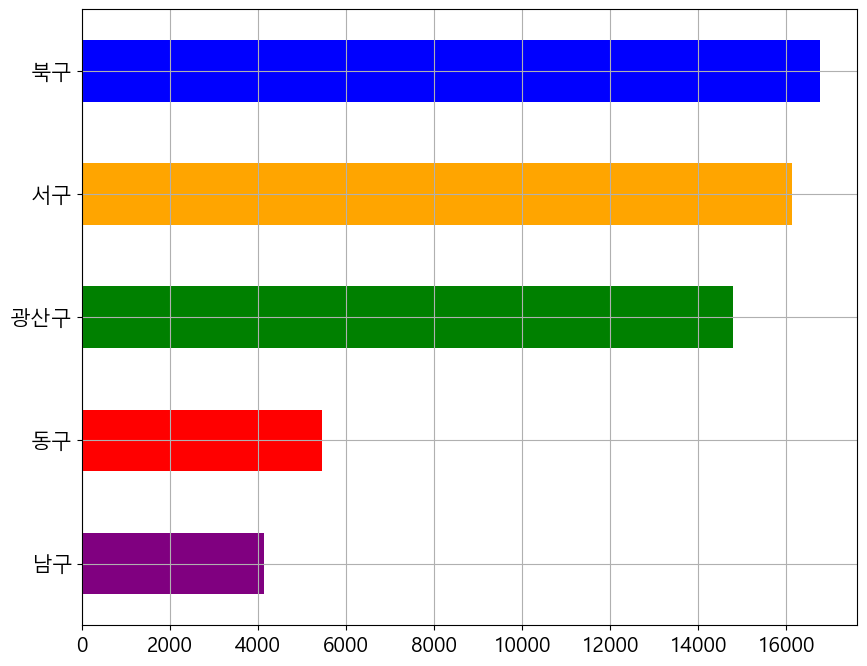

In [202]:
# 2020년도 상반기 전기차 충전소 사용 빈도 시각화

chargecountgj20_df = pd.value_counts(chargecountgj20_df['구'].values, sort=True, ascending = True)
chargecountgj20_df.plot.barh()
chargecountgj20_df.plot.barh(grid=True, color = ['purple', 'red', 'green', 'orange', 'blue'], figsize=(10,8), fontsize=15)